In [1]:
#Visión computacional es un área multidisciplinaria que busca obtener datos de imagenes
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

%matplotlib inline

Text(0.5,1,'Carlos Gonzalez')

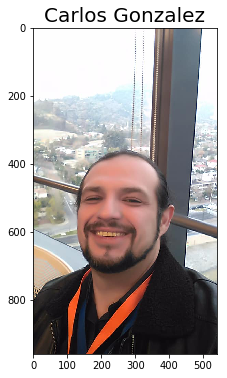

In [9]:
im_file='Data/yo2.jpg'
im = io.imread(im_file)#leer la imagen

fig, ax = plt.subplots(1, 1, figsize=(8, 6))#tamaño de imagen y generacion de plot
ax.imshow(im)#muestra imagen
ax.axis('on')#muestra datos de grafico
ax.set_title('Carlos Gonzalez', fontsize=20)#pone titulo a la imagen

In [10]:
print("Canales: ",im.ndim)
print("dimension: ",im.shape)

Canales:  3
dimension:  (960, 540, 3)


In [11]:
from skimage import exposure

def iter_channels(color_image):
    for channel in np.rollaxis(color_image, -1):
        yield channel

def plot_histogram(image, ax=None, **kwargs):
    ax = ax if ax is not None else plt.gca()

    if image.ndim == 2:
        _plot_histogram(ax, image, color='black', **kwargs)
    elif image.ndim == 3:
        for channel, channel_color in zip(iter_channels(image), 'rgb'):
            _plot_histogram(ax, channel, color=channel_color, **kwargs)


def _plot_histogram(ax, image, alpha=0.3, **kwargs):
    hist, bin_centers = exposure.histogram(image)
    ax.fill_between(bin_centers, hist, alpha=alpha, **kwargs)
    ax.set_xlabel('intensity')
    ax.set_ylabel('# pixels')

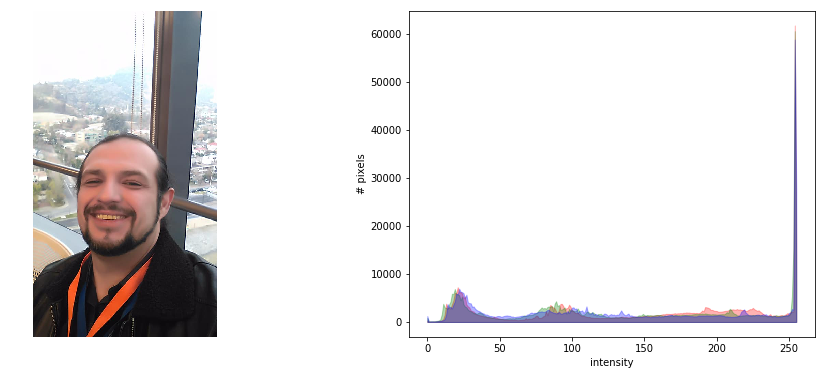

In [12]:
fig, (ax_image, ax_hist) = plt.subplots(ncols=2, figsize=(2*8, 6))

ax_image.imshow(im)
ax_image.axis('off')
plot_histogram(im, ax=ax_hist)

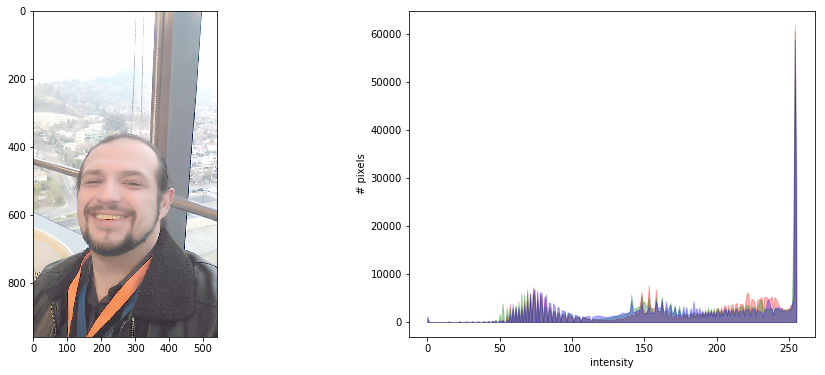

In [13]:
#ajustar Gama
im_bright = exposure.adjust_gamma(im, gamma=0.5, gain=1)
fig, (ax_image, ax_hist) = plt.subplots(ncols=2, figsize=(2*8, 6))
ax_image.imshow(im_bright)
plot_histogram(im_bright, ax=ax_hist)

Text(0.5,1,'Buzz Aldrin - Canny $\\sigma=3$')

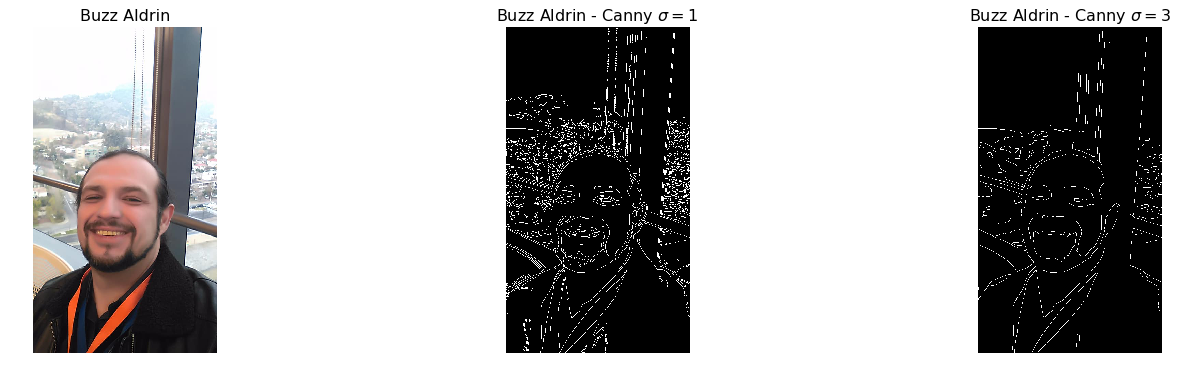

In [14]:
from skimage.color import rgb2gray
from skimage import feature

im_gray = rgb2gray(im)

edges1 = feature.canny(im_gray)
edges2 = feature.canny(im_gray, sigma=3)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 6),
                                    sharex=True, sharey=True)

ax1.imshow(im)
ax1.axis('off')
ax1.set_title('Lobo', fontsize=16)

ax2.imshow(edges1, cmap=plt.cm.gray)
ax2.axis('off')
ax2.set_title('Lobo - Canny $\sigma=1$', fontsize=16)

ax3.imshow(edges2, cmap=plt.cm.gray)
ax3.axis('off')
ax3.set_title('Lobo - Canny $\sigma=3$', fontsize=16)

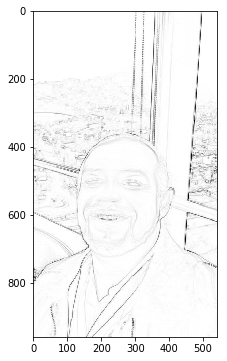

In [15]:
from skimage.exposure import rescale_intensity
from skimage.color.adapt_rgb import adapt_rgb
from skimage import filters
from skimage.color import rgb2gray

def as_gray(image_filter, image, *args, **kwargs):
    gray_image = rgb2gray(image)
    return image_filter(gray_image, *args, **kwargs)

@adapt_rgb(as_gray)
def sobel_gray(image):
    return filters.sobel(image)

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.imshow(rescale_intensity(1 - sobel_gray(im)), cmap=plt.cm.gray)

In [17]:
#trabajando con opencv pip install opencv-python y pip install opencv-python-contrib
import cv2
import imutils# utilidades con imagenes para instalar en anaconda  conda install -c pjamesjoyce imutils 
from imutils.object_detection import non_max_suppression

print('OpenCV version: ', cv2.__version__)
print('imutils version: ', imutils.__version__)

OpenCV version:  3.3.1
imutils version:  0.4.6


Text(0.5,1,'Lobo')

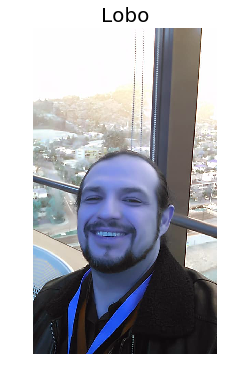

In [36]:
im_file='Data/yo2.jpg'
im=cv2.imread(im_file)
#opencv trabajo los colores en vez de RGB como BGR
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.imshow(im)
ax.axis('off')
ax.set_title('Lobo', fontsize=20)
#por eso la imagen se ve distorcionada


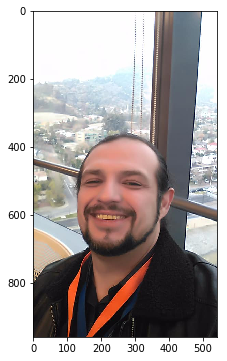

In [37]:
im_rgb = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)#de esta manera se arregla
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.imshow(im_rgb)

In [38]:
cv2.imshow('image',im)
cv2.waitKey(0)#para cerrar la ventana al apretar una tecla
cv2.destroyAllWindows()

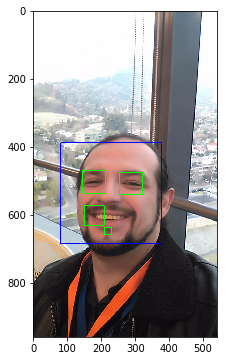

In [39]:
face_cascade = cv2.CascadeClassifier('Librerias/haarcascade_frontalface_default.xml')#carga libreria para reconocer rostros
eye_cascade = cv2.CascadeClassifier('Librerias/haarcascade_eye.xml')#carga libreria para reconocer ojos
im_bgr = im.copy()#crea una copia de la imagen para manipular
im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
# detect faces in the image
faces = face_cascade.detectMultiScale(im_gray, scaleFactor=1.3, minNeighbors=5)#detecta caras
for (x,y,w,h) in faces:#por cada rostro encontrado
    cv2.rectangle(im_bgr,(x,y),(x+w,y+h),(255,0,0),2)#dibuja un rectangulo
    roi_gray = im_gray[y:y+h, x:x+w]
    roi_color = im_bgr[y:y+h, x:x+w]
    
    eyes = eye_cascade.detectMultiScale(roi_gray, scaleFactor=1.1, minNeighbors=3, minSize=(10,10), maxSize=(120,120))
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)#dibuja un cuadro por cada ojo

im_rgb = cv2.cvtColor(im_bgr, cv2.COLOR_BGR2RGB)
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.imshow(im_rgb)

#cv2.imshow('image',im_bgr)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

(-0.5, 539.5, 959.5, -0.5)

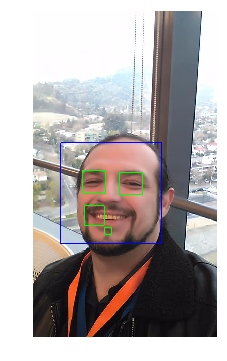

In [40]:
im_bgr = im.copy()
im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

faces = face_cascade.detectMultiScale(im_gray, scaleFactor=1.3, minNeighbors=5)
for (x,y,w,h) in faces:
    cv2.rectangle(im_bgr,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = im_gray[y:y+h, x:x+w]
    roi_color = im_bgr[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray, scaleFactor=1.1, minNeighbors=3, minSize=(10,10), maxSize=(120,120))

    rects = np.array([[x, y, x + w, y + h] for (x, y, w, h) in eyes])
    eyes_nms = non_max_suppression(rects, probs=None, overlapThresh=0.65)
    
    for (ex1,ey1,ex2,ey2) in eyes_nms:
        cv2.rectangle(roi_color,(ex1,ey1),(ex2,ey2),(0,255,0),2)

im_rgb = cv2.cvtColor(im_bgr, cv2.COLOR_BGR2RGB)
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.imshow(im_rgb)
ax.axis('off')

(-0.5, 959.5, 719.5, -0.5)

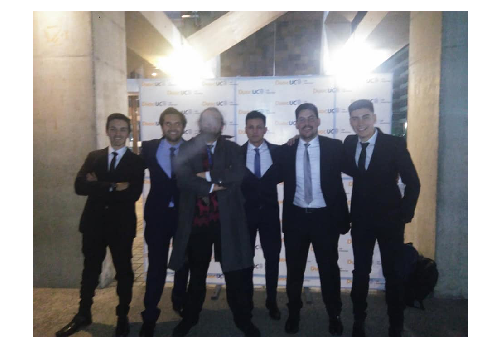

In [43]:
#detectar personas usando patron HOG
im_file='Data/otros.jpg'

im=cv2.imread(im_file)
im_rgb = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.imshow(im_rgb)
ax.axis('off')

(-0.5, 399.5, 299.5, -0.5)

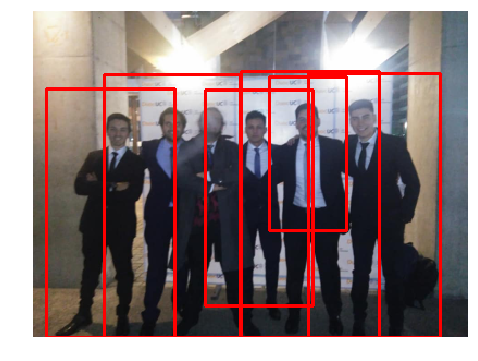

In [44]:
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

im_bgr = im.copy()
im_bgr = imutils.resize(im_bgr, width=min(400, im_bgr.shape[1]))

# detect people in the image
(rects, weights) = hog.detectMultiScale(im_bgr, winStride=(4, 4),
    padding=(6, 6), scale=1.05)

# draw the original bounding boxes
for (x, y, w, h) in rects:
    cv2.rectangle(im_bgr, (x, y), (x + w, y + h), (0, 0, 255), 2)

im_rgb = cv2.cvtColor(im_bgr, cv2.COLOR_BGR2RGB)
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.imshow(im_rgb)
ax.axis('off')